In [1]:
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier

# Load Turkish and German CRNN models
turkish_model = tf.keras.models.load_model("MP_Data/Turkish/action_turkish_cnnlstm.h5")
german_model = tf.keras.models.load_model("MP_Data/German/action_german_cnnlstm.h5")

In [2]:
turkish_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 1662, 32)      320       
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 1662, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 831, 64)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 831, 128)      73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 415, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 415, 256)      

In [3]:
german_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 1662, 32)      320       
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 1662, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 831, 64)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 831, 128)      73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 415, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 415, 256)      

In [4]:
# Define action labels
turkish_action_labels = ["kral", "kuafor", "universite", "uyumak", "sevmek", "muhendis"]
german_action_labels = ["bitte", "danke", "gut", "ichliebedich", "mude", "hallo"]

In [5]:
# Load data
turkish_data = []
german_data = []

In [11]:
german_data

[array([[ 0.68831939],
        [ 0.22972003],
        [-0.47473568],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.6838361 ],
        [ 0.24086903],
        [-0.52307653],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.68378323],
        [ 0.24086282],
        [-0.46209574],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.6829055 ],
        [ 0.24210976],
        [-0.43796933],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.68254018],
        [ 0.24124454],
        [-0.43208769],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.6818856 ],
        [ 0.2412331 ],
        [-0.46936491],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.68176663],
        [ 0.2417105 ],
        [-0.45654079],
        ...,


In [17]:
german_data = []
for label in german_action_labels:
    for i in range(30):
        filepath = f"MP_Data/German/{label}/{i}/{i}.npy"
        features = np.load(filepath).reshape(1662, 1)
        german_data = np.append(german_data, features)

    german_data = np.concatenate(german_data, axis=1)
    german_data = np.expand_dims(german_data, axis=-1) # Add extra dimension for channel
    german_data = np.tile(german_data, (30, 1, 1, 1)) # Repeat the single sample 30 times

    prediction = german_model.predict(german_data)
    prediction = prediction.flatten()

ValueError: in user code:

    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 30, 1662, 1), found shape=(None, 1, 49860, 1)


In [13]:
label

'danke'

In [7]:
german_data = []
for label in german_action_labels:
    for i in range(30):
        filepath = f"MP_Data/German/{label}/{i}/{i}.npy"
        features = np.load(filepath).reshape(1662, 1)
        german_data.append(features)

    german_data = np.concatenate(german_data, axis=1)
    german_data = np.expand_dims(german_data, axis=-1) # Add extra dimension for channel
    german_data = np.tile(german_data, (30, 1, 1, 1)) # Repeat the single sample 30 times

    prediction = german_model.predict(german_data)
    prediction = prediction.flatten()

ValueError: cannot reshape array of size 1662 into shape (30,1)

In [28]:
turkish_data = []
for i in range(30):
    filepath = f"MP_Data/Turkish/{label}/{i}/{i}.npy"
    features = np.load(filepath).reshape(1662, 1)
    turkish_data.append(features)

turkish_data = np.concatenate(turkish_data, axis=1)
turkish_data = np.expand_dims(turkish_data, axis=-1) # Add extra dimension for channel
turkish_data = np.tile(turkish_data, (30, 1, 1, 1)) # Repeat the single sample 30 times

prediction = turkish_model.predict(turkish_data)
prediction = prediction.flatten()


ValueError: in user code:

    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 30, 1662, 1), found shape=(None, 1662, None, 1)


In [27]:
label

'kral'

In [8]:
for label in turkish_action_labels:
    for i in range(30):
        filepath = f"MP_Data/Turkish/{label}/{i}/{i}.npy"
        features = np.load(filepath).reshape(1, 1662, 1)
        features = np.expand_dims(features, axis=-1)  # Add extra dimension for channel
        features = np.tile(features, (30, 1, 1, 1))  # Repeat the single sample 30 times
        prediction = turkish_model.predict(features)
        prediction = prediction.flatten()
        turkish_data = np.append(turkish_data, prediction)
            
for label in german_action_labels:
    for i in range(30):
        filepath = f"MP_Data/German/{label}/{i}/{i}.npy"
        features_german = np.load(filepath).reshape(1, 1662, 1)
        features_german = np.expand_dims(features, axis=-1)  # Add extra dimension for channel
        features_german = np.tile(features, (30, 1, 1, 1))  # Repeat the single sample 30 times
        prediction = german_model.predict(features_german)
        prediction = prediction.flatten()
        german_data = np.append(german_data, prediction)

turkish_data = np.array(turkish_data)
german_data = np.array(german_data)


ValueError: in user code:

    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Gaming\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 30, 1662, 1), found shape=(None, 1662, 1, 1)


In [8]:
features.shape

(1662,)

In [23]:
turkish_data

array([ 0.46126133,  0.44977626,  0.45424041, ...,  0.        ,
       -0.00919735, -0.01343342])

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
import os
import cv2

# Model dosyalarının yolu
turkish_model_path = "MP_Data/Turkish/action_turkish_cnnlstm.h5"
german_model_path = "MP_Data/German/action_german_cnnlstm.h5"

# Türkçe ve Almanca kelimelerin listesi
turkish_words = ["kral", "kuafor", "universite", "uyumak", "sevmek", "muhendis"]
german_words = ["bitte", "danke", "gut", "ichliebedich", "mude", "hallo"]


# Veri kümesini hazırlama
X_train = []
y_train = []

for word in turkish_words:
    for i in range(30):
        file_path = os.path.join("MP_Data/Turkish", word, str(i), str(i) + ".npy")
        features = np.load(file_path)
        X_train.append(features) # ilk 6 özellik
        y_train.append("Turkish")

for word in german_words:
    for i in range(30):
        file_path = os.path.join("MP_Data/German", word, str(i), str(i) + ".npy")
        features = np.load(file_path)
        X_train.append(features) # ilk 6 özellik
        y_train.append("German")

X_train = np.array(X_train)
y_train = np.array(y_train)

# KNN modelini oluşturma
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
img[0]

In [28]:


# Kamera kullanarak tahmin etme
cap = cv2.VideoCapture("videos/kral.mp4")

# Döngü
while True:
    # Kameradan bir görüntü yakalayın
    ret, frame = cap.read()
# Check if frame is valid
    if not ret:
        # Set video file position to first frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue
    # Görüntüyü işleme
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (1662, 30))
    img = np.squeeze(img)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    # Reshape the image to 2D
    img = img.reshape(img.shape[0], -1)

    label = knn.predict(img[0])

    # Hangi modelin yükleneceğini belirleme
    if label == "Turkish":
        print("ı am gere")
        model = load_model(turkish_model_path)
        classes = turkish_words
    elif label == "German":
        model = load_model(german_model_path)
        classes = german_words

    # Modeli kullanarak tahmin yapma
    prediction = model.predict(img)
    predicted_class = classes[np.argmax(prediction)]

    # Tahmin sonuçlarını gö


    # Tahmin sonuçlarını gösterme
    cv2.putText(frame, predicted_class, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Gesture Recognition", frame)

    # Çıkış yapmak için "q" tuşuna basın
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Temizleme
cap.release()
cv2.destroyAllWindows()



ValueError: Expected 2D array, got 1D array instead:
array=[4 4 4 ... 2 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
X_train.shape

(360, 6)

In [33]:
features.shape

(1, 6)

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model


# Medipipe modelini başlatma
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

# Model isimlerini ve etiketlerini tanımlama
turkish_model_path = "action_turkish_crnn.h5"
german_model_path = "action_german_crnn.h5"
labels = ["Turkish", "German"]

# Eylemler
turkish_actions = ["kral","kuafor","universite","uyumak","sevmek","muhendis"]
german_actions = ["bitte","danke", "gut","ichliebedich","mude","hallo"]
actions = turkish_actions + german_actions

# KNN Modelini ve CRNN modellerini yükleme
knn = load_knn_model()
turkish_model = load_model(turkish_model_path)
german_model = load_model(german_model_path)

# Yeni özellik çıkarma fonksiyonu
def extract_features(image):
    # Medipipe holistic modeli ile elde edilen nokta koordinatları
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Görüntüyü işleme
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        
        # Nokta koordinatlarından özellik vektörü çıkarma
        feature_vector = np.array([])
        if results.face_landmarks:
            feature_vector = np.concatenate((feature_vector, np.array(results.face_landmarks.landmark).flatten()))
        if results.left_hand_landmarks:
            feature_vector = np.concatenate((feature_vector, np.array(results.left_hand_landmarks.landmark).flatten()))
        if results.right_hand_landmarks:
            feature_vector = np.concatenate((feature_vector, np.array(results.right_hand_landmarks.landmark).flatten()))

        return feature_vector

# Döngü
cap = cv2.VideoCapture(0)

while True:
    # Kameradan bir görüntü yakalayın
    ret, frame = cap.read()

    # Görüntüyü işleme
    features = extract_features(frame)

    # Özellikleri yeniden şekillendirin
    features = features.reshape(1, -1)

    # Tahmin yapma
    label = knn.predict(features)[0]

    # Hangi modelin yükleneceğini belirleme
    if label == "Turkish":
        model = turkish_model
    elif label == "German":
        model = german_model
    else:
        continue

    # Modeli kullanarak tahmin yapma
    sequence = []
    threshold = 0.8
    sentence = []
    keypoints = extract_keypoints(model, frame, mp_holistic)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        if len(res) > 0:
            # Viz probabilities
            image = prob_viz(res, actions, image, [(255,


In [ ]:
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        
        if len(res) > 0:
            # Viz probabilities
            image = prob_viz(res, actions, image, [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])

            # Perform action
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
                    
                # Remove first element if the length of the sentence exceeds 5
                if len(sentence) > 5:
                    sentence = sentence[-5:]
                    
                # Display the sentence
                cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3,30), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                    
    # Show the resulting image
    cv2.imshow('Detection', image)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video capture object and destroy the windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import csv

In [3]:
mp_holistic = mp.solutions.holistic # Holistic german_german_german_model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
import math
# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

def countFingers(image, results, draw=True, display=True):
    # Get the height and width of the input image.
    height, width, _ = image.shape
    
    # Create a copy of the input image to write the count of fingers on.
    output_image = image.copy()
    
    # Initialize a dictionary to store the count of fingers of both hands.
    count = {'RIGHT': 0, 'LEFT': 0}
    
    # Store the indexes of the tips landmarks of each finger of a hand in a list.
    fingers_tips_ids = [mp_holistic.HandLandmark.INDEX_FINGER_TIP, mp_holistic.HandLandmark.MIDDLE_FINGER_TIP,
                        mp_holistic.HandLandmark.RING_FINGER_TIP, mp_holistic.HandLandmark.PINKY_TIP,
                        mp_holistic.HandLandmark.THUMB_TIP]
    
    # Initialize a dictionary to store the status (i.e., True for open and False for close) of each finger of both hands.
    fingers_statuses = {'RIGHT_THUMB': False, 'RIGHT_INDEX': False, 'RIGHT_MIDDLE': False, 'RIGHT_RING': False,
                        'RIGHT_PINKY': False, 'LEFT_THUMB': False, 'LEFT_INDEX': False, 'LEFT_MIDDLE': False,
                        'LEFT_RING': False, 'LEFT_PINKY': False}
    
    # Initialize a list to store the landmarks of the finger tips of each finger that is up for both hands.
    fingers_landmarks = {'RIGHT': [], 'LEFT': []}
    
    # Get the landmarks of both hands.
    right_hand_landmarks = results.right_hand_landmarks
    left_hand_landmarks = results.left_hand_landmarks
    
    # Iterate over both hands.
    for hand_landmarks, hand_label in [(left_hand_landmarks, 'LEFT'), (right_hand_landmarks, 'RIGHT')]:
        if hand_landmarks is not None:
            # Iterate over the indexes of the tips landmarks of each finger of the hand.
            # Iterate over the indexes of the tips landmarks of each finger of the hand.
            for tip_index in fingers_tips_ids:
                
                # Retrieve the label (i.e., index, middle, etc.) of the finger on which we are iterating upon.
                finger_name = tip_index.name.split("_")[0]
                
                # Check if the finger is up by comparing the y-coordinates of the tip and pip landmarks.
                if (hand_landmarks.landmark[tip_index].y < hand_landmarks.landmark[tip_index - 2].y):
                    
                    # Update the status of the finger in the dictionary to true.
                    fingers_statuses[hand_label.upper()+"_"+finger_name] = True
                    
                    # Increment the count of the fingers up of the hand by 1.
                    count[hand_label.upper()] += 1
                    
                    # Add the landmark of the finger tip to the list of landmarks of the finger tips of the hand.
                    fingers_landmarks[hand_label.upper()].append(hand_landmarks.landmark[tip_index])
            
            # Retrieve the y-coordinates of the tip and mcp landmarks of the thumb of the hand.
            thumb_tip_x = hand_landmarks.landmark[mp_holistic.HandLandmark.THUMB_TIP].x
            thumb_mcp_x = hand_landmarks.landmark[mp_holistic.HandLandmark.THUMB_TIP - 2].x
        
        
            # Check if the thumb is up by comparing the hand label and the x-coordinates of the retrieved landmarks.
    if (hand_label=='Right' and (thumb_tip_x < thumb_mcp_x)) or (hand_label=='Left' and (thumb_tip_x > thumb_mcp_x)):
        
        # Update the status of the thumb in the dictionary to true.
        fingers_statuses[hand_label.upper()+"_THUMB"] = True
        
        # Increment the count of the fingers up of the hand by 1.
        count[hand_label.upper()] += 1
        
    shoulder_landmark = []
    distance = 0
    print(hand_label)
    if results.pose_landmarks and hand_landmarks:
        if results.left_hand_landmarks:
            print("Leftss")
            shoulder_landmark = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER]
            
        else:
            print("Rightss")
            shoulder_landmark = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER]
            
        # Get the x, y, z-coordinates of the hand and the shoulder.
        hand_x, hand_y, hand_z = hand_landmarks.landmark[mp_holistic.HandLandmark.WRIST].x, hand_landmarks.landmark[mp_holistic.HandLandmark.WRIST].y, hand_landmarks.landmark[mp_holistic.HandLandmark.WRIST].z
        shoulder_x, shoulder_y, shoulder_z = shoulder_landmark.x, shoulder_landmark.y, shoulder_landmark.z
        # Calculate the distance between the hand and the shoulder.
        distance = math.sqrt((hand_x - shoulder_x) ** 2 + (hand_y - shoulder_y) ** 2 + (hand_z - shoulder_z) ** 2)
        # Draw the distance between the hand and the shoulder on the output image.
        if draw:    
            cv2.putText(output_image, f"Distance: {distance:.2f}", (int(shoulder_landmark.x*width), int(shoulder_landmark.y*height)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
            
    print("Distance",distance)
            
    angle_between_fingers = 0
    # Calculate the angle between the index finger and the thumb, if both fingers are up.
    if fingers_statuses[hand_label.upper()+"_INDEX"] and fingers_statuses[hand_label.upper()+"_THUMB"]:
        # Get the landmarks of the index finger and the thumb.
        index_finger_tip = hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP]
        thumb_tip = hand_landmarks.landmark[mp_holistic.HandLandmark.THUMB_TIP]
        wrist = hand_landmarks.landmark[mp_holistic.HandLandmark.WRIST]
        
        # Calculate the angle between the index finger and the thumb using the dot product.
        thumb_to_index_finger_vector = np.array([thumb_tip.x - wrist.x, thumb_tip.y - wrist.y, thumb_tip.z - wrist.z])
        index_finger_tip_to_wrist_vector = np.array([index_finger_tip.x - wrist.x, index_finger_tip.y - wrist.y, index_finger_tip.z - wrist.z])
        
        if np.linalg.norm(thumb_to_index_finger_vector) == 0 or np.linalg.norm(index_finger_tip_to_wrist_vector) == 0:
            angle_between_fingers = 0 # ya da başka bir özel değer ataması yapabilirsiniz.
        else:
            angle_between_fingers = np.arccos(np.dot(thumb_to_index_finger_vector, index_finger_tip_to_wrist_vector) / (np.linalg.norm(thumb_to_index_finger_vector) * np.linalg.norm(index_finger_tip_to_wrist_vector)))
            angle_between_fingers = np.degrees(angle_between_fingers)
     
        # Draw the angle between the index finger and the thumb on the output image.
        if draw:
            cv2.putText(output_image, f"{angle_between_fingers:.2f}°", (int(thumb_tip.x*width), int(thumb_tip.y*height)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
    print("Angle Between Fingers",angle_between_fingers)
    # Check if the total count of the fingers of both hands are specified to be written on the output image.
    if draw:
        # Write the total count of the fingers of both hands on the output image.
        cv2.putText(output_image, " Total Fingers: ", (10, 25),cv2.FONT_HERSHEY_COMPLEX, 1, (20,255,155), 2)
        cv2.putText(output_image, str(sum(count.values())), (width//2-150,240), cv2.FONT_HERSHEY_SIMPLEX,
                    8.9, (20,255,155), 10, 10)

    # Check if the output image is specified to be displayed.
    if display:
        # Display the output image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    # Otherwise
    else:
        for key in fingers_statuses:
            if fingers_statuses[key] == True:
                fingers_statuses[key] = 1
            else:
                fingers_statuses[key] = 0
        fstatus = np.array(list(fingers_statuses.values()))
        #print("LeftHand",results.multi_hand_landmarks[0])
        #print(fstatus)
        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        #print("face",face)
        supportValues = np.array([count['RIGHT'], count['LEFT'], distance, angle_between_fingers])
        print("SupportValues",supportValues)
        # Return the output image, the status of each finger and the count of the fingers up of both hands.
        return output_image,np.concatenate([pose, face, lh, rh,fstatus, supportValues]) 

In [7]:
cap = cv2.VideoCapture("videos/ichliebedich.mp4")

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Check if frame is valid
        if not ret:
            # Set video file position to first frame
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
       
        # Draw landmarks
        draw_styled_landmarks(image, results) 
        
        image,keypoints = countFingers(image, results,display=False)    

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 4 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 4 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 4 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Rightss
Distance 0.26133161798387167
Angle Between Fingers 0
SupportValues [0.         0.         0.26133162 0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Betw

In [14]:
keypoints

array([ 0.68896347,  0.23322779, -0.51151621, ...,  0.        ,
        0.12303161, 40.78410259])

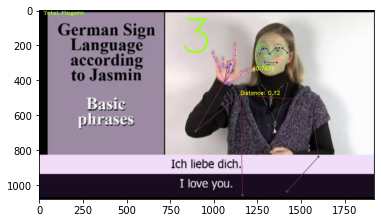

In [10]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('New_Mechanism_Datas/English') 

# Actions that we try to detect
# actions = np.array(['kral','kuafor','muhendis','palyaco','video','vergi','sahte','mimar','ofke','onay','polis','ortak','savunma','olay','yetki','kaptan'
#                       ,'profesor','teketek','teklif','ticaret','sicil','sevmek','takip','vaat','usta','hocam','trafik','universite','uyumak','pisman'])
# Actions that we try to detect
actions = np.array(['no','yes','fine','you','nice','slow','takecare','morning','see','i','how','hello','happy','goodbye','afternoon','busy','night','learn','meet','sad','thankyou','soso','later','asl'
                      ,'again','please','samehere','sign','what','name'])
#actions = np.array(['kral','kuafor','muhendis'])
# Thirty videos worth of data
# actions = np.array(['Arabic(active)','Arabic(adult)','Arabic(age)','Arabic(Best)','Arabic(black)','Arabic(cake)','Arabic(child)','Arabic(chocolate)','Arabic(Color)','Arabic(Delicious)','Arabic(example)'
#                     ,'Arabic(future)','Arabic(he)','Arabic(joke)','Arabic(laugh)','Arabic(motivate)','Arabic(old)','Arabic(past)','Arabic(Permission)','Arabic(Present)','Arabic(quiet)'
#                     ,'Arabic(red)','Arabic(respect)','Arabic(same)','Arabic(she)','Arabic(they)','Arabic(usedto)','Arabic(we)','Arabic(white)','Arabic(you)'])
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [9]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [10]:
os.listdir('videos')

['afternoon.mp4',
 'again.mp4',
 'Arabic(active).mp4',
 'Arabic(adult).mp4',
 'Arabic(age).mp4',
 'Arabic(Best).mp4',
 'Arabic(black).mp4',
 'Arabic(cake).mp4',
 'Arabic(child).mp4',
 'Arabic(chocolate).mp4',
 'Arabic(Color).mp4',
 'Arabic(Delicious).mp4',
 'Arabic(example).mp4',
 'Arabic(future).mp4',
 'Arabic(green).mp4',
 'Arabic(he).mp4',
 'Arabic(joke).mp4',
 'Arabic(laugh).mp4',
 'Arabic(motivate).mp4',
 'Arabic(old).mp4',
 'Arabic(past).mp4',
 'Arabic(Permission).mp4',
 'Arabic(Present).mp4',
 'Arabic(quiet).mp4',
 'Arabic(red).mp4',
 'Arabic(respect).mp4',
 'Arabic(same).mp4',
 'Arabic(she).mp4',
 'Arabic(they).mp4',
 'Arabic(usedto).mp4',
 'Arabic(we).mp4',
 'Arabic(white).mp4',
 'Arabic(you).mp4',
 'asl.mp4',
 'bitte.mp4',
 'busy.mp4',
 'danke.mp4',
 'fine.mp4',
 'goodbye.mp4',
 'gut.mp4',
 'hallo.mp4',
 'happy.mp4',
 'hello.mp4',
 'hocam.mp4',
 'how.mp4',
 'i.mp4',
 'ichliebedich.mp4',
 'kaptan.mp4',
 'kral.mp4',
 'kuafor.mp4',
 'later.mp4',
 'learn.mp4',
 'meet.mp4',
 'mima

In [11]:
cap = cv2.VideoCapture("videos/Arabic(active).mp4")
cap.set(3,1280)
cap.set(4,960)
 
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # NEW LOOP
        # Loop through actions
        for action in actions:
            
            for file in os.listdir('videos'):
                if file.endswith('.mp4'):
                    file_action = file.split('.')[0]
                    if file_action == action:
                        cap = cv2.VideoCapture(os.path.join('videos', file))
                    # ...
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()

                    # Check if frame is valid
                    if not ret:
                        # Set video file position to first frame
                        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
                        continue

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
                    print(results)
                
                    # Draw landmarks
                    draw_styled_landmarks(image, results) 
                    
                    image,keypoints = countFingers(image, results,display=False)
                                            
                    
                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                    
                   
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Break gracefullyq
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                        
        cap.release()
        cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Distance 0
Angle Between Fingers 0
SupportValues [0 0 0 0]
<class 'mediapipe.python

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'no': 0,
 'yes': 1,
 'fine': 2,
 'you': 3,
 'nice': 4,
 'slow': 5,
 'takecare': 6,
 'morning': 7,
 'see': 8,
 'i': 9,
 'how': 10,
 'hello': 11,
 'happy': 12,
 'goodbye': 13,
 'afternoon': 14,
 'busy': 15,
 'night': 16,
 'learn': 17,
 'meet': 18,
 'sad': 19,
 'thankyou': 20,
 'soso': 21,
 'later': 22,
 'asl': 23,
 'again': 24,
 'please': 25,
 'samehere': 26,
 'sign': 27,
 'what': 28,
 'name': 29}

In [12]:
import shutil
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            filename = "{}.npy".format(frame_num)
            file_path = os.path.join(DATA_PATH, action, str(sequence), filename)
            if os.path.exists(file_path):
                res = np.load(file_path)
            else:
                # If the file is missing, copy the previous frame's file
                prev_filename = "{}.npy".format(frame_num-1)
                prev_file_path = os.path.join(DATA_PATH, action, str(sequence), prev_filename)
                shutil.copy(prev_file_path, file_path)
                res = np.load(file_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(900, 30, 1676)

In [14]:
np.array(labels).shape

(900,)

In [15]:
X = np.array(sequences)

In [16]:
X.shape

(900, 30, 1676)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [21]:
y_test.shape

(45, 30)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,MaxPooling2D, Flatten, Dense ,TimeDistributed
from tensorflow.keras.models import Sequential

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
# Just CNN
from keras.layers import Dropout
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(30, 1676)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
27/27 [==============================] - 1s 13ms/step - loss: 3.4240 - categorical_accuracy: 0.0398
Epoch 2/2000
27/27 [==============================] - 0s 12ms/step - loss: 3.2902 - categorical_accuracy: 0.0737
Epoch 3/2000
27/27 [==============================] - 0s 13ms/step - loss: 2.7720 - categorical_accuracy: 0.1462
Epoch 4/2000
27/27 [==============================] - 0s 13ms/step - loss: 2.4719 - categorical_accuracy: 0.2000
Epoch 5/2000
27/27 [==============================] - 0s 14ms/step - loss: 2.0423 - categorical_accuracy: 0.2702
Epoch 6/2000
27/27 [==============================] - 0s 14ms/step - loss: 1.7992 - categorical_accuracy: 0.3263
Epoch 7/2000
27/27 [==============================] - 0s 13ms/step - loss: 1.6165 - categorical_accuracy: 0.3977
Epoch 8/2000
27/27 [==============================] - 0s 13ms/step - loss: 1.4747 - categorical_accuracy: 0.4351
Epoch 9/2000
27/27 [==============================] - 0s 13ms/step - loss: 1.2560 - categorical_

In [22]:
res = [.7, 0.2, 0.1]

In [23]:
actions[np.argmax(res)]

'no'

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            160928    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 128)           0

In [25]:
model.save('action_newMechanismEnglish_thirtyset.h5')

In [26]:
model.load_weights('action_newMechanismEnglish_thirtyset.h5')

In [27]:
res = model.predict(X_test)

In [28]:
actions[np.argmax(res[0])]

'see'

In [29]:
actions[np.argmax(y_test[0])]

'see'

In [30]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix, accuracy_score 

In [31]:
yhat = model.predict(X_test)

In [32]:
X_test

array([[[ 4.96716142e-01,  2.20823377e-01, -4.67681229e-01, ...,
          0.00000000e+00,  1.91647016e-01,  1.23851609e+01],
        [ 4.96716142e-01,  2.20823377e-01, -4.67681229e-01, ...,
          0.00000000e+00,  1.91647016e-01,  1.23851609e+01],
        [ 4.95057970e-01,  2.20639870e-01, -4.08662945e-01, ...,
          0.00000000e+00,  1.51145812e-01,  1.16874112e+01],
        ...,
        [ 4.95167822e-01,  2.21178755e-01, -3.19493353e-01, ...,
          0.00000000e+00,  9.43266670e-02,  1.36740983e+01],
        [ 4.95401949e-01,  2.21194580e-01, -3.39424759e-01, ...,
          0.00000000e+00,  1.05041105e-01,  1.26966034e+01],
        [ 4.95624036e-01,  2.21213058e-01, -3.41241509e-01, ...,
          0.00000000e+00,  1.07072876e-01,  1.35231520e+01]],

       [[ 5.06259859e-01,  2.44834363e-01, -4.46622938e-01, ...,
          5.00000000e+00,  3.45693716e-01,  0.00000000e+00],
        [ 5.06242037e-01,  2.47031599e-01, -4.78227884e-01, ...,
          5.00000000e+00,  3.40376866e

In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [34]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[42,  0],
        [ 0,  3]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[42,  0],
        [ 0,  3]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[42,  0],
        [ 0,  3]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[42,  0],
        [ 0,  3]],

       [[44,  0],
        [ 0,  1]],

       [[42,  0],
        [ 0,  3]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]]], dtype=int64)

In [35]:
accuracy_score(ytrue, yhat)

1.0

In [36]:
classification_report(ytrue, yhat)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         2\n           4       1.00      1.00      1.00         3\n           5       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         1\n           8       1.00      1.00      1.00         2\n          10       1.00      1.00      1.00         3\n          11       1.00      1.00      1.00         1\n          12       1.00      1.00      1.00         1\n          13       1.00      1.00      1.00         1\n          14       1.00      1.00      1.00         1\n          15       1.00      1.00      1.00         2\n          17       1.00      1.00      1.00         2\n          18       1.00      1.00      1.00         2\n          19       1.00      1.00      1.00         1\n          20       1.00      1.00      1.00         2\n       

In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
import os
import cv2
# Model dosyalarının yolu
turkish_model_path = "action_turkish_cnnlstm.h5"
german_model_path = "MP_Data/German/action_german_cnnlstm.h5"
english_model_path = "action_english_thirtyset.h5"
english_model_path = "action_arabic_thirtyset.h5"
#  actions = np.array(['kral','kuafor','muhendis','palyaco','video','vergi','sahte','mimar','ofke','onay','polis','ortak','savunma','olay','yetki','kaptan'
#                      ,'profesor','teketek','teklif','ticaret','sicil','sevmek','takip','vaat','usta','hocam','trafik','universite','uyumak','pisman'])
# # Actions that we try to detect
# actions = np.array(['no','yes','fine','you','nice','slow','takecare','morning','see','i','how','hello','happy','goodbye','afternoon','busy','night','learn','meet','sad','thankyou','soso','later','asl'
                    #,'again','please','samehere','sign','what','name'])
# Türkçe, Almanca ve İngilizce kelimelerin listesi
turkish_words = ['kral','kuafor','muhendis','palyaco','video','vergi','sahte','mimar','ofke','onay','polis','ortak','savunma','olay','yetki','kaptan'
                    ,'profesor','teketek','teklif','ticaret','sicil','sevmek','takip','vaat','usta','hocam','trafik','universite','uyumak','pisman']

german_words = ["bitte", "danke", "gut", "ichliebedich", "mude", "hallo"]
english_words = ['no','yes','fine','you','nice','slow','takecare','morning','see','i','how','hello','happy','goodbye','afternoon','busy','night','learn','meet','sad','thankyou','soso','later','asl'
                    ,'again','please','samehere','sign','what','name']
arabic_words =['Arabic(active)','Arabic(adult)','Arabic(age)','Arabic(Best)','Arabic(black)','Arabic(cake)','Arabic(child)','Arabic(chocolate)','Arabic(Color)','Arabic(Delicious)','Arabic(example)'
                    ,'Arabic(future)','Arabic(he)','Arabic(joke)','Arabic(laugh)','Arabic(motivate)','Arabic(old)','Arabic(past)','Arabic(Permission)','Arabic(Present)','Arabic(quiet)'
                    ,'Arabic(red)','Arabic(respect)','Arabic(same)','Arabic(she)','Arabic(they)','Arabic(usedto)','Arabic(we)','Arabic(white)','Arabic(you)']

# Veri kümesini hazırlama
X_train = []
y_train = []

for word in turkish_words:
    for i in range(30):
        file_path = os.path.join("New_Mechanism_Datas/Turkish", word, str(i), str(i) + ".npy")
        features = np.load(file_path)
        X_train.append(features)
        y_train.append("Turkish")


for word in english_words:
    for i in range(30):
        file_path = os.path.join("New_Mechanism_Datas/English", word, str(i), str(i) + ".npy")
        features = np.load(file_path)
        X_train.append(features)
        y_train.append("English")
for word in arabic_words:
    for i in range(30):
        file_path = os.path.join("New_Mechanism_Datas/Arabic", word, str(i), str(i) + ".npy")
        features = np.load(file_path)
        X_train.append(features)
        y_train.append("Arabic")
        
X_train = np.array(X_train)
y_train = np.array(y_train)

# Veri kümesini yeniden boyutlandırma
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# KNN modelini oluşturma
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)



sequence = np.array(sequence)
prediction = knn.predict(sequence)[0]

print(prediction)


English


In [45]:
def knnPrediction(sequence):
    sequence = np.array(sequence)
    prediction = knn.predict(sequence)[0]
    print(prediction)
    return prediction

In [49]:
import os
import glob
import random

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
# define a list of video file paths
video_paths = ["videos/hello.mp4", "videos/profesor.mp4", "videos/hocam.mp4","videos/happy.mp4","videos/Arabic(Best).mp4"]

# choose a random video path to start with
random.shuffle(video_paths)
video_index = 0
current_path = video_paths[video_index]
# Renkler
red_color = (0, 0, 255)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
cap = cv2.VideoCapture("videos/sad.mp4")
# Open the selected video file with cv2.VideoCapture()
#cap = cv2.VideoCapture("videos/sad.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    play_count = 0
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Check if frame is valid
        if not ret:
            # check if we've played the video twice
            play_count += 1
            if play_count == 2:
                # move to next video
                video_index += 1
                if video_index >= len(video_paths):
                    break
                current_path = video_paths[video_index]
                cap.release()
                cap = cv2.VideoCapture(current_path)
                play_count = 0
            else:
                # rewind the video to play again
                cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        image,keypoints = countFingers(image, results,display=False) 
        # sequence.insert(0,keypoints)
        # sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        kPrediction = knnPrediction(sequence)
        # Burada, tahmin sonucunu yazdırmak için bir koşul ifadesi kullanıyoruz
        if kPrediction == "Turkish":
            cv2.putText(image, "Turkish", (150, 150), font, font_scale, red_color, 2, cv2.LINE_AA)
            model.load_weights("action_newMechanismTurkish_thirtyset.h5")
            actions = np.array(['kral','kuafor','muhendis','palyaco','video','vergi','sahte','mimar','ofke','onay','polis','ortak','savunma','olay','yetki','kaptan'
                    ,'profesor','teketek','teklif','ticaret','sicil','sevmek','takip','vaat','usta','hocam','trafik','universite','uyumak','pisman'])
        elif kPrediction =="English":
            cv2.putText(image, "English", (150, 150), font, font_scale, red_color, 2, cv2.LINE_AA)
            model.load_weights("action_newMechanismEnglish_thirtyset.h5")  
            actions = np.array(['no','yes','fine','you','nice','slow','takecare','morning','see','i','how','hello','happy','goodbye','afternoon','busy','night','learn','meet','sad','thankyou','soso','later','asl'
                    ,'again','please','samehere','sign','what','name'])
        elif kPrediction == "Arabic":
            cv2.putText(image, "Arabic", (150, 150), font, font_scale, red_color, 2, cv2.LINE_AA)
            model.load_weights("action_newMechanismArabic_thirtyset.h5")  
            actions = np.array(['Arabic(active)','Arabic(adult)','Arabic(age)','Arabic(Best)','Arabic(black)','Arabic(cake)','Arabic(child)','Arabic(chocolate)','Arabic(Color)','Arabic(Delicious)','Arabic(example)'
                    ,'Arabic(future)','Arabic(he)','Arabic(joke)','Arabic(laugh)','Arabic(motivate)','Arabic(old)','Arabic(past)','Arabic(Permission)','Arabic(Present)','Arabic(quiet)'
                    ,'Arabic(red)','Arabic(respect)','Arabic(same)','Arabic(she)','Arabic(they)','Arabic(usedto)','Arabic(we)','Arabic(white)','Arabic(you)'])
        else:
            cv2.putText(image, "German", (150, 150), font, font_scale, red_color, 2, cv2.LINE_AA)
            print("Its German")
        #cv2.imshow('Language: ',frame)
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            if len(res) > 0:
                #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                #image = prob_viz(res, actions, image, [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])

                
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Leftss
Distance 0.3135491839579443
Angle Between Fingers 11.030203424953502
SupportValues [ 5.          5.          0.31354918 11.03020342]
English
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Leftss
Distance 0.30462454720892723
Angle Between Fingers 11.365278283839112
SupportValues [ 5.          5.          0.30462455 11.36527828]
English
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Leftss
Distance 0.31468885729990936
Angle Between Fingers 12.533564503981486
SupportValues [ 5.          5.          0.31468886 12.5335645 ]
English
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Leftss
Distance 0.3122355953917598
Angle Between Fingers 13.883646754388817
SupportValues [ 5.          5.          0.3122356  13.88364675]
English
<class 'mediapipe.python.solution_base.SolutionOutputs'>
RIGHT
Leftss
Distance 0.306310679390824
Angle Between Fingers 15.346364385320115
SupportValues [ 

In [37]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [38]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("videos/hello.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        if not ret:
        # Set video file position to first frame
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
                
        # Draw landmarks
        draw_styled_landmarks(image, results) 
                    
        image,keypoints = countFingers(image, results,display=False)
                                
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # # Viz probabilities
            # image= prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

RIGHT
Rightss
Distance 0.2965627740660962
Angle Between Fingers 23.514586930913595
SupportValues [ 5.          0.          0.29656277 23.51458693]
RIGHT
Rightss
Distance 0.30469199226074295
Angle Between Fingers 27.84821851221535
SupportValues [ 5.          0.          0.30469199 27.84821851]
RIGHT
Rightss
Distance 0.30671292172028913
Angle Between Fingers 28.339716558618882
SupportValues [ 5.          0.          0.30671292 28.33971656]
RIGHT
Rightss
Distance 0.30860552834876226
Angle Between Fingers 29.02255019885832
SupportValues [ 5.          0.          0.30860553 29.0225502 ]
RIGHT
Rightss
Distance 0.3094272186956111
Angle Between Fingers 31.526658784166464
SupportValues [ 5.          0.          0.30942722 31.52665878]
RIGHT
Rightss
Distance 0.3113954079213683
Angle Between Fingers 34.190919806535156
SupportValues [ 5.          0.          0.31139541 34.19091981]
RIGHT
Rightss
Distance 0.31011316491119556
Angle Between Fingers 32.80501164202715
SupportValues [ 5.          0.    